In [1]:
from statistical_analysis import load_data, create_csv, prepare_data_frame, test_normality, fisher_z_transform, statistical_testing, visualize_results, linear_regression_analysis
from topographical_analysis import visualize_connectivity, visualize_difference, regional_differences
import os

In [2]:
import pyreadstat

# read the .sav file
questionnaire_data, meta = pyreadstat.read_sav("/home/agata/Desktop/thesis/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav")
display(questionnaire_data.head())

# IDs of participants in the neural synchrony dataset
ids = ['T029', 'T035', 'T036', 'T049', 'T050', 'T056', 'T122', 'T137', 'T188', 'T212', 'T262', 'T287', 'T290', 'T351', 'T389', 'T435', 'T475', 'T477', 'T484', 'T487', 'T520', 'T551', 'T563', 'T576', 'T596', 'T600', 'T623', 'T637', 'T655', 'T682', 'T684', 'T775', 'T802', 'T815', 'T882', 'T892', 'T899', 'T916', 'T917', 'T997']

# IDs of participants from the qualtrics survey
questionnaire_data_ids = list(questionnaire_data['ID'])
excluded_participants = ['T475', 'T563', 'T623', 'T802', 'T899', 'T916', 'T917']

# list of participant IDs to exclude because of missing data
exclude_ids = [i for i in questionnaire_data_ids if i not in ids or i in excluded_participants]

# exclude rows with the specified IDs
questionnaire_data = questionnaire_data[~questionnaire_data['ID'].isin(exclude_ids)]

questionnaire_data.to_csv(os.getcwd() + '/results/BrainsInSync_Questionnaire_Data.csv')

,ID,RecordedDate,Date_EEG,Age_child_EEG_Days,Age_child_EEG_Months,Birthdate_child,Sex_Infant,GA_atbirth_1,GA_atbirth_2,Type_Birth,...,PBQ_Sum,PBQ_General_Mean,PBQ_General_Sum,PBQ_AngerRejection_Mean,PBQ_AngerRejection_Sum,PBQ_ConfidenceAnx_Mean,PBQ_ConfidenceAnx_Sum,PBQ_AgressionBaby_Mean,PBQ_AgressionBaby_Sum,Opmerkingen_overig
0,T802,2021-04-14 10:10:45,2021-04-23,417.0,13.0,2020-03-02,1.0,38,2,1.0,...,4.0,0.166667,2.0,0.142857,1.0,0.25,1.0,0.0,0.0,
1,T563,2021-04-28 19:19:05,2021-04-29,327.0,10.0,2020-06-06,1.0,39,4,1.0,...,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,
2,T029,2021-04-28 22:56:12,2021-05-19,370.0,12.0,2020-05-14,1.0,39,6,1.0,...,31.0,1.500000,18.0,1.285714,9.0,1.00,4.0,0.0,0.0,
3,T035,2021-05-10 20:11:42,2021-05-12,357.0,11.0,2020-05-20,1.0,38,4,1.0,...,6.0,0.250000,3.0,0.000000,0.0,0.75,3.0,0.0,0.0,
4,T775,2021-05-12 18:47:39,2021-05-21,233.0,7.0,2020-09-30,2.0,39,6,1.0,...,4.0,0.250000,3.0,0.000000,0.0,0.25,1.0,0.0,0.0,


# Alpha PLV

Test statistic: 0.9631109237670898
p-value =  0.00022770768555346876 -> data is non-normally distributed
Test statistic: 0.956810474395752
p-value =  5.555658935918473e-05 -> data is non-normally distributed
Main effect
             Source         W  ddof1         Q     p-unc
Friedman  Condition  0.024059      4  3.175758  0.528855
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.423808   0.423808    0.423808  0.876414
StillFace1   0.423808    1.000000   0.876414    0.876414  0.843868
FreePlay2    0.423808    0.876414   1.000000    0.903071  0.903071
StillFace2   0.423808    0.876414   0.903071    1.000000  0.903071
Reunion      0.876414    0.843868   0.903071    0.903071  1.000000


Z-values:

[[   0. -182. -190. -193. -237.]
 [ 182.    0. -246. -249. -224.]
 [ 190.  246.    0. -270. -265.]
 [ 193.  249.  270.    0. -265.]
 [ 237.  224.  265.  265.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/alpha_resul

/home/agata/Desktop/thesis/topographical_analysis.py:276: RuntimeWarning: Mean of empty slice
  mean_sf_combined = np.nanmean(sf_combined, axis=3)
/home/agata/Desktop/thesis/topographical_analysis.py:280: RuntimeWarning: Mean of empty slice
  mean_fp_combined = np.nanmean(fp_combined, axis=3)


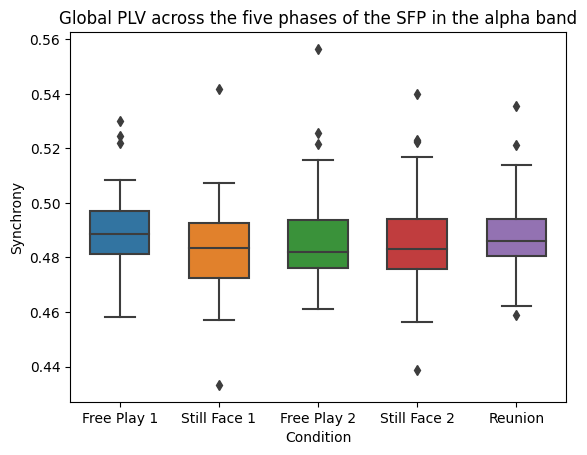

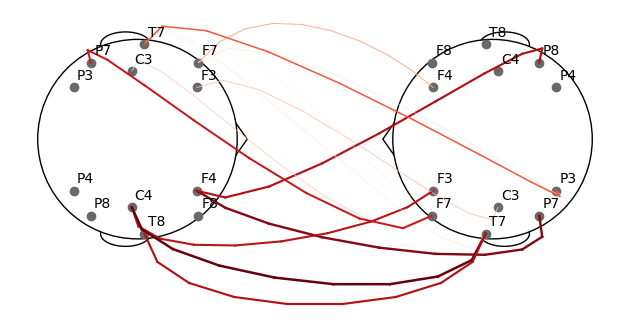

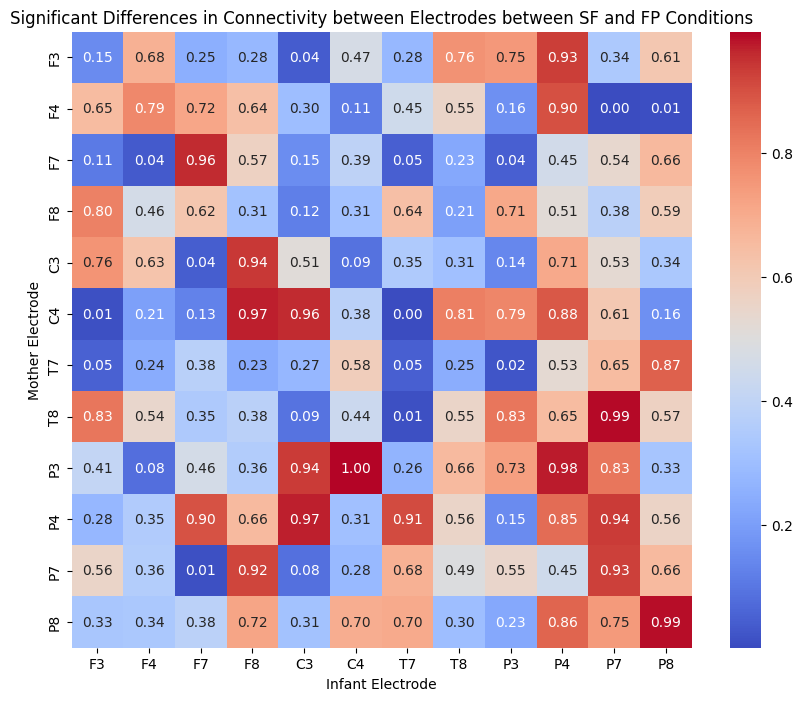

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.87358953 0.32136114 0.02117229]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


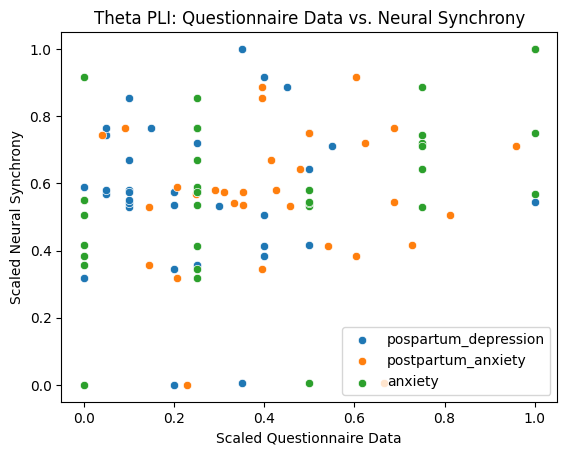

In [3]:
participant_indices_alpha_plv, data_array_alpha_plv = load_data(os.getcwd() + '/results/validated_results_alpha_plv.json')
create_csv(data_array_alpha_plv, participant_indices_alpha_plv, "validated_data_alpha_plv.csv", os.getcwd() + '/results')
df_melted_alpha_plv = prepare_data_frame(data_array_alpha_plv)
test_normality(df_melted_alpha_plv)
fisher_z_transform(data_array_alpha_plv)
statistical_testing(df_melted_alpha_plv)
visualize_results(df_melted_alpha_plv, 
                  frequency='alpha',
                  method = 'PLV',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_plv.png",
                  save_folder=os.getcwd() + '/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_plv.json", 
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
#                        sfreq=250,
#                        threshold=0.5)
visualize_difference(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_plv.json",
                     mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl",
                     baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)

linear_regression_analysis(os.getcwd() + "/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", os.getcwd() + '/results/validated_data_alpha_plv.csv')

# Theta PLV

Test statistic: 0.9556348323822021
p-value =  4.316076228860766e-05 -> data is non-normally distributed
Test statistic: 0.9424890875816345
p-value =  3.130090362901683e-06 -> data is non-normally distributed
Main effect
             Source        W  ddof1         Q     p-unc
Friedman  Condition  0.24775      4  32.70303  0.000001
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.000059   0.061243    0.007759  0.480779
StillFace1   0.000059    1.000000   0.000052    0.113638  0.000052
FreePlay2    0.061243    0.000052   1.000000    0.053092  0.046217
StillFace2   0.007759    0.113638   0.053092    1.000000  0.005281
Reunion      0.480779    0.000052   0.046217    0.005281  1.000000


Z-values:

[[   0.  -64. -186. -133. -274.]
 [  64.    0.  -59. -207.  -59.]
 [ 186.   59.    0. -179. -172.]
 [ 133.  207.  179.    0. -123.]
 [ 274.   59.  172.  123.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/theta_results

/home/agata/Desktop/thesis/topographical_analysis.py:276: RuntimeWarning: Mean of empty slice
  mean_sf_combined = np.nanmean(sf_combined, axis=3)
/home/agata/Desktop/thesis/topographical_analysis.py:280: RuntimeWarning: Mean of empty slice
  mean_fp_combined = np.nanmean(fp_combined, axis=3)


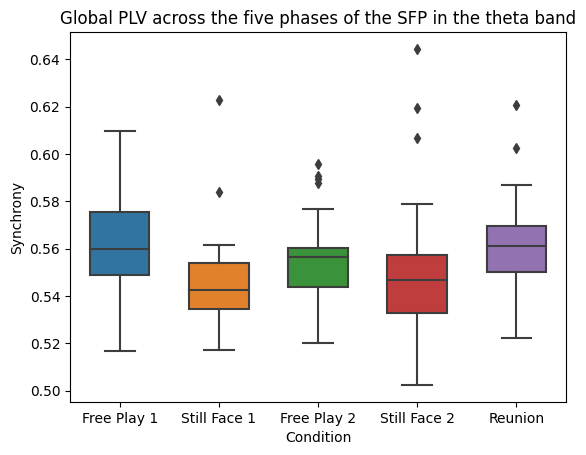

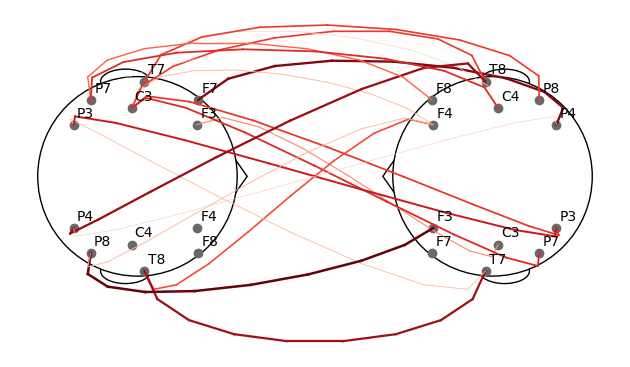

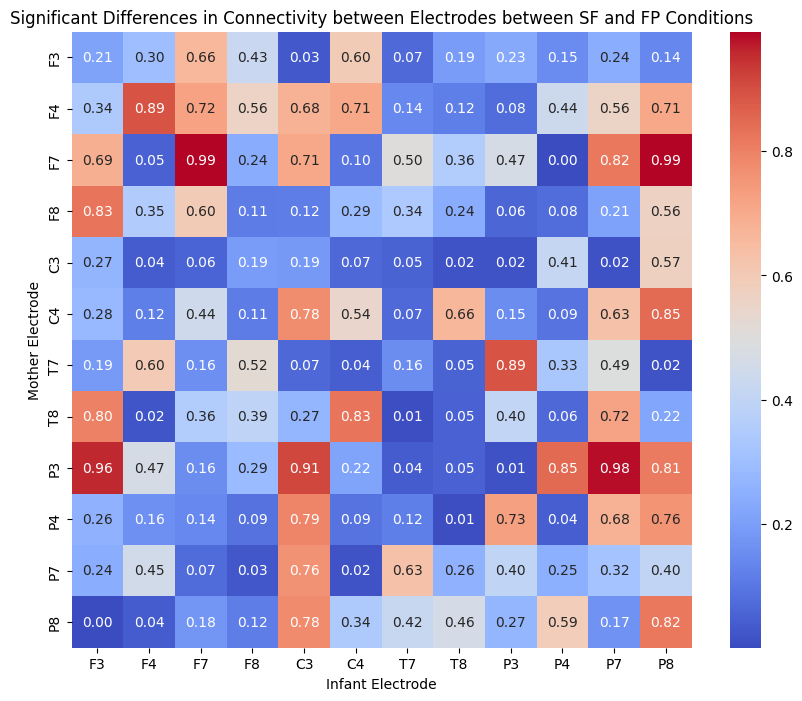

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.92639262 0.20879077 0.33464425]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


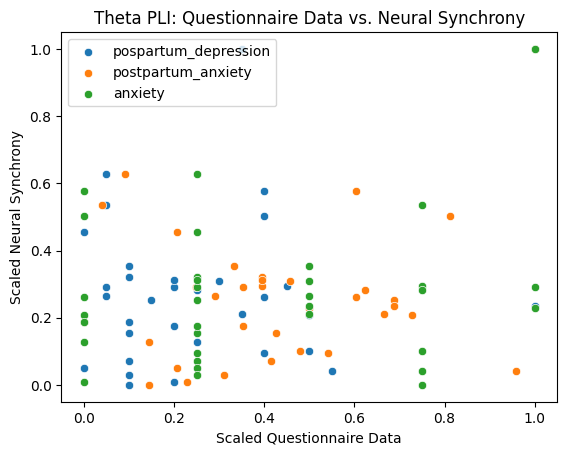

In [4]:
participant_indices_theta_plv, data_array_theta_plv = load_data(os.getcwd() + '/results/validated_results_theta_plv.json')
create_csv(data_array_theta_plv, participant_indices_theta_plv, "validated_data_theta_plv.csv", os.getcwd() + '/results')
df_melted_theta_plv = prepare_data_frame(data_array_theta_plv)
test_normality(df_melted_theta_plv)
fisher_z_transform(data_array_theta_plv)
statistical_testing(df_melted_theta_plv)
visualize_results(df_melted_theta_plv, 
                  frequency='theta',
                  method='PLV',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_plv.png",
                  save_folder=os.getcwd() + '/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_theta_plv.json", 
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
#                        sfreq=250,
#                        threshold=0.56)
visualize_difference(results_path=os.getcwd() + "/results/validated_results_theta_plv.json",
                     mom_epochs_path=os.getcwd() + "/results/moms_epochs_averaged.pkl",
                     baby_epochs_path=os.getcwd() + "/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)
linear_regression_analysis(os.getcwd() + "/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_theta_plv.csv')

# Alpha PLI

Test statistic: 0.9887709617614746
p =  0.21306730806827545 -> data is normally distributed
Test statistic: 0.9883928894996643
p =  0.19180308282375336 -> data is normally distributed
Main effect
             Source         W  ddof1         Q     p-unc
Friedman  Condition  0.039853      4  5.260606  0.261587
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.876081   1.000000    0.550404  0.550404
StillFace1   0.876081    1.000000   0.673948    0.550404  0.550404
FreePlay2    1.000000    0.673948   1.000000    0.550404  0.550404
StillFace2   0.550404    0.550404   0.550404    1.000000  0.465575
Reunion      0.550404    0.550404   0.550404    0.465575  1.000000


Z-values:

[[   0. -262. -278. -222. -193.]
 [ 262.    0. -243. -229. -229.]
 [ 278.  243.    0. -229. -210.]
 [ 222.  229.  229.    0. -168.]
 [ 193.  229.  210.  168.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/alpha_results_pli.png
Not setting m

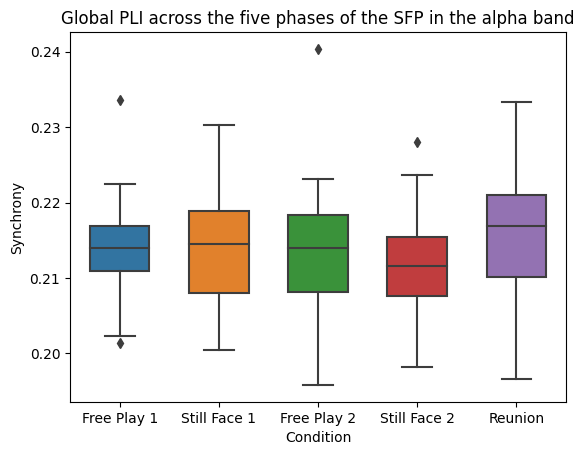

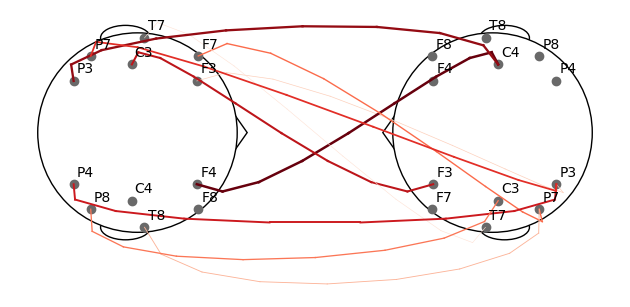

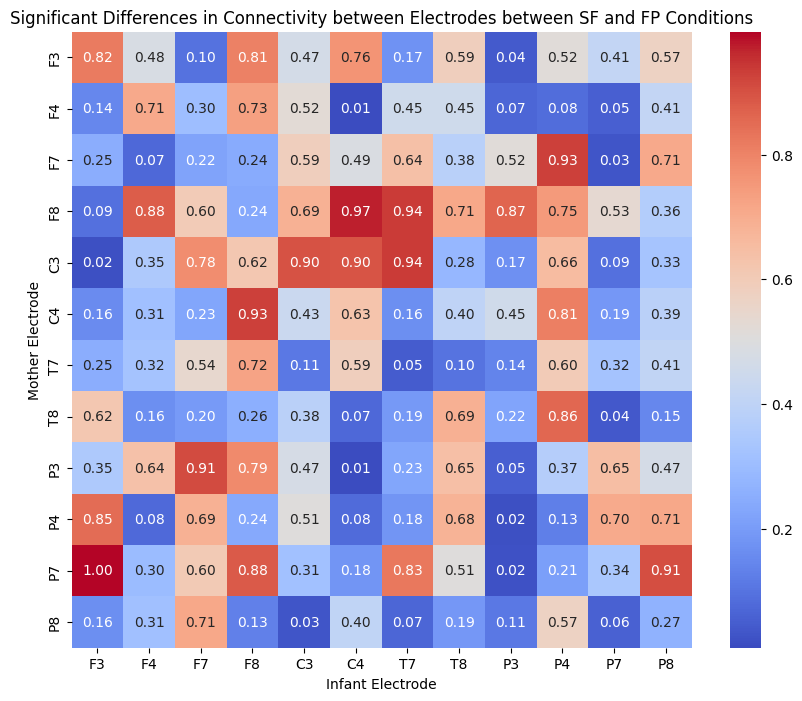

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.13692908 0.09902121 0.98730369]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


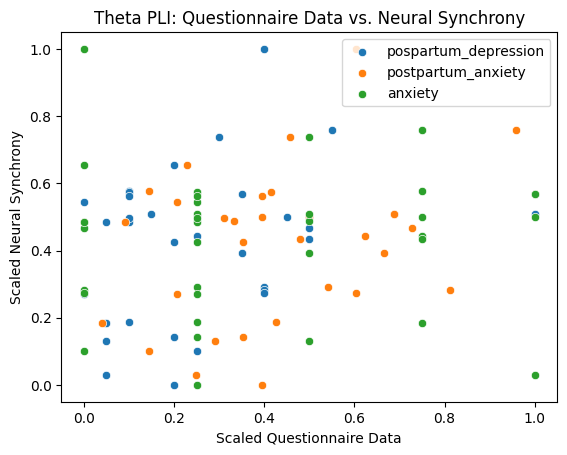

In [5]:
participant_indices_alpha_pli, data_array_alpha_pli = load_data("/home/agata/Desktop/thesis/results/validated_results_alpha_pli.json")
create_csv(data_array_alpha_pli, participant_indices_alpha_pli, "validated_data_alpha_pli.csv", '/home/agata/Desktop/thesis/results')
df_melted_alpha_pli = prepare_data_frame(data_array_alpha_pli)
test_normality(df_melted_alpha_pli)
fisher_z_transform(data_array_alpha_pli)
statistical_testing(df_melted_alpha_pli)
visualize_results(df_melted_alpha_pli, 
                  frequency='alpha',
                  method = 'PLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_pli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_pli.json",
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
#                        sfreq=250,
#                        threshold=0.22)
visualize_difference(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_pli.json",
                     mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl",
                     baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)
linear_regression_analysis("/home/agata/Desktop/thesis/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_alpha_pli.csv')

# Theta PLI

Test statistic: 0.934256911277771
p-value =  7.099230856510985e-07 -> data is non-normally distributed
Test statistic: 0.9306322336196899
p-value =  3.817519598214858e-07 -> data is non-normally distributed
Main effect
             Source         W  ddof1          Q     p-unc
Friedman  Condition  0.092746      4  12.242424  0.015637
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.366442   0.016581    0.016581  0.016882
StillFace1   0.366442    1.000000   0.016581    0.016581  0.016581
FreePlay2    0.016581    0.016581   1.000000    0.366442  0.420000
StillFace2   0.016581    0.016581   0.366442    1.000000  0.382067
Reunion      0.016882    0.016581   0.420000    0.382067  1.000000


Z-values:

[[   0. -252. -145. -149. -155.]
 [ 252.    0. -146. -151. -145.]
 [ 145.  146.    0. -258. -280.]
 [ 149.  151.  258.    0. -267.]
 [ 155.  145.  280.  267.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/theta_resu

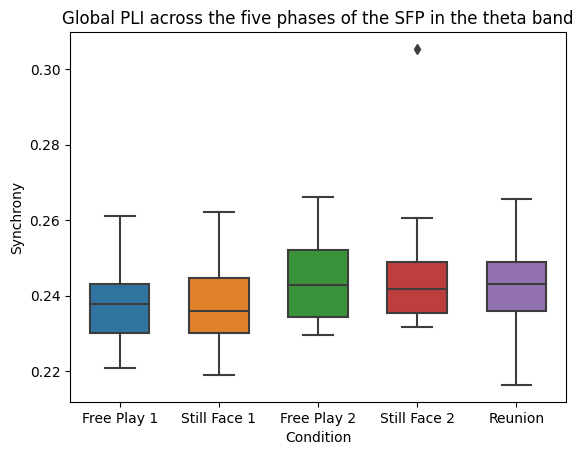

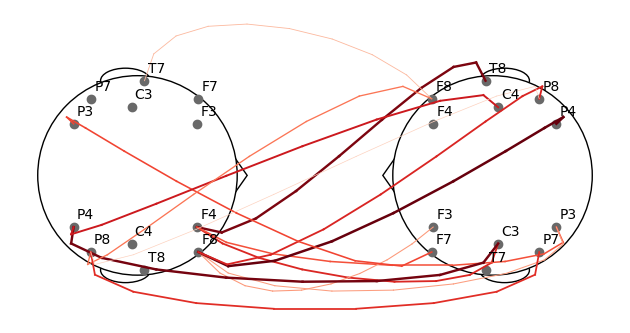

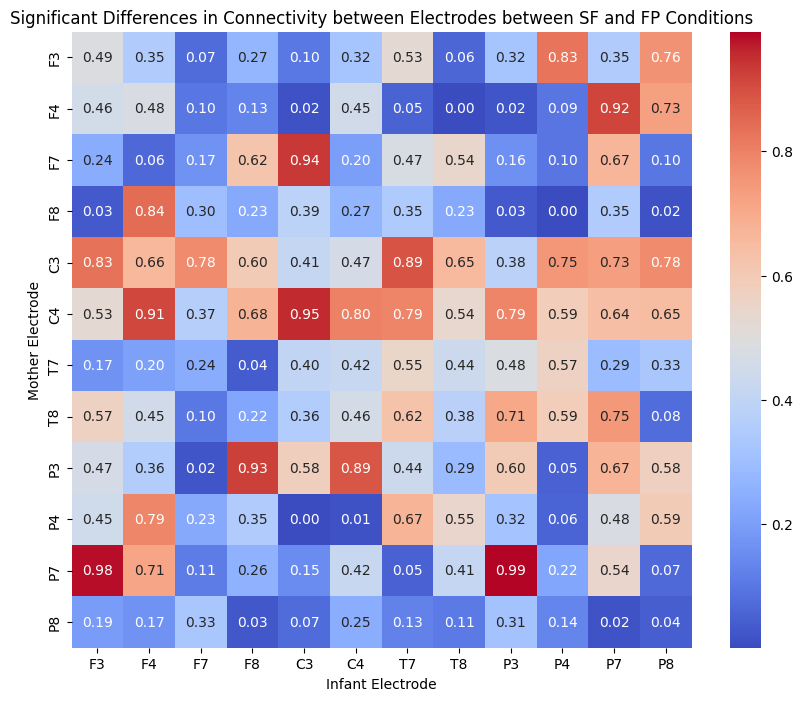

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.29894899 0.48929435 0.75681097]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


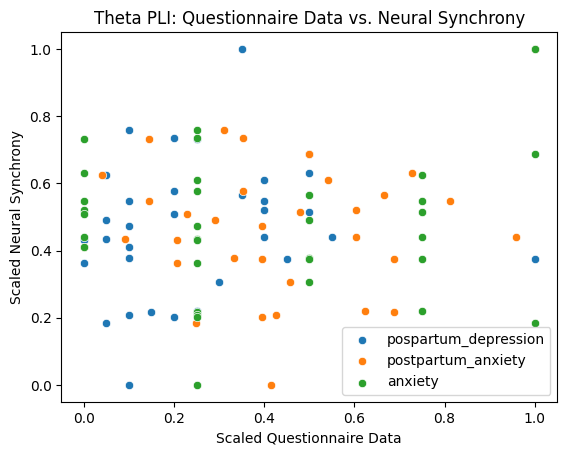

In [6]:
participant_indices_theta_pli, data_array_theta_pli = load_data(os.getcwd() + "/results/validated_results_theta_pli.json")
create_csv(data_array_theta_pli, participant_indices_theta_pli, "validated_data_theta_pli.csv", os.getcwd() + '/results')
df_melted_theta_pli = prepare_data_frame(data_array_theta_pli)
test_normality(df_melted_theta_pli)
fisher_z_transform(data_array_theta_pli)
statistical_testing(df_melted_theta_pli)
visualize_results(df_melted_theta_pli, 
                  frequency='theta',
                  method='PLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_pli.png",
                  save_folder= os.getcwd() + '/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_theta_pli.json", 
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'], 
#                        sfreq=250,
#                        threshold=0.25)
visualize_difference(results_path=os.getcwd() + "/results/validated_results_theta_pli.json",
                     mom_epochs_path=os.getcwd() + "/results/moms_epochs_averaged.pkl",
                     baby_epochs_path=os.getcwd() + "/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)
linear_regression_analysis(os.getcwd() + "/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", '/home/agata/Desktop/thesis/results/validated_data_theta_pli.csv')

# Alpha wPLI

Test statistic: 0.92079097032547
p-value =  7.741032703734163e-08 -> data is non-normally distributed
Test statistic: 0.9137390851974487
p-value =  2.6484848092422908e-08 -> data is non-normally distributed
Main effect
             Source         W  ddof1          Q     p-unc
Friedman  Condition  0.196327      4  25.915152  0.000033
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.026604   0.187526    0.026604  0.015165
StillFace1   0.026604    1.000000   0.014446    0.488129  0.000541
FreePlay2    0.187526    0.014446   1.000000    0.014446  0.026604
StillFace2   0.026604    0.488129   0.014446    1.000000  0.000541
Reunion      0.015165    0.000541   0.026604    0.000541  1.000000


Z-values:

[[   0. -165. -224. -166. -145.]
 [ 165.    0. -140. -275.  -76.]
 [ 224.  140.    0. -135. -163.]
 [ 166.  275.  135.    0.  -83.]
 [ 145.   76.  163.   83.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/alpha_resu

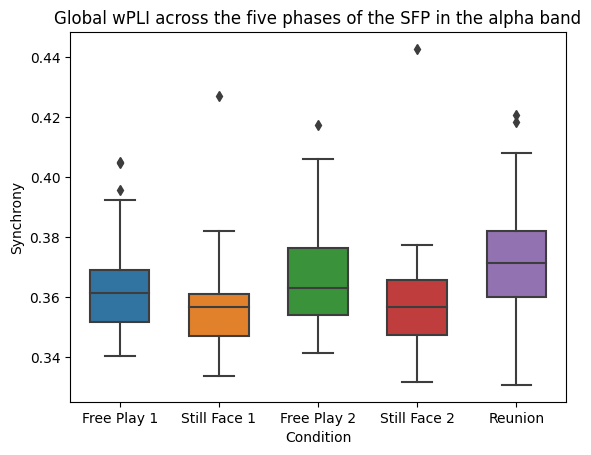

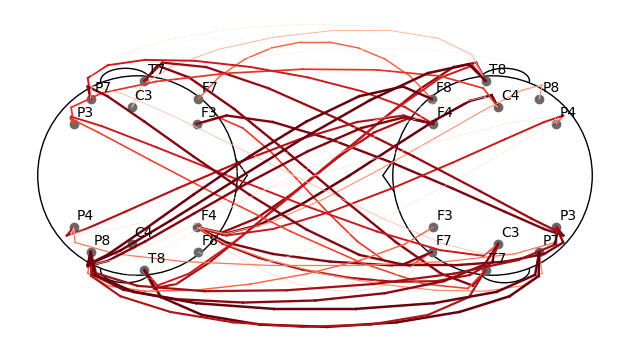

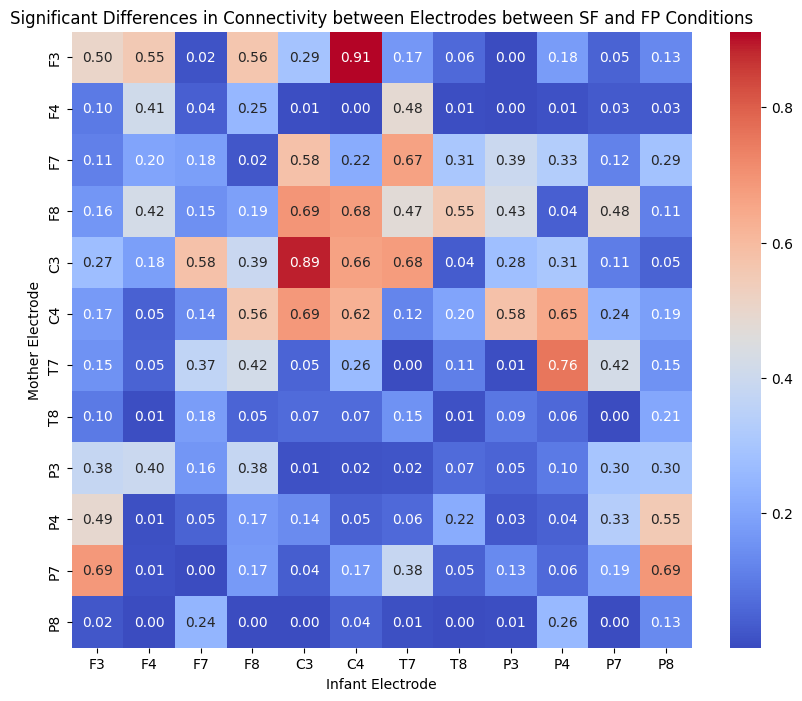

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.86490742 0.80173446 0.63971823]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


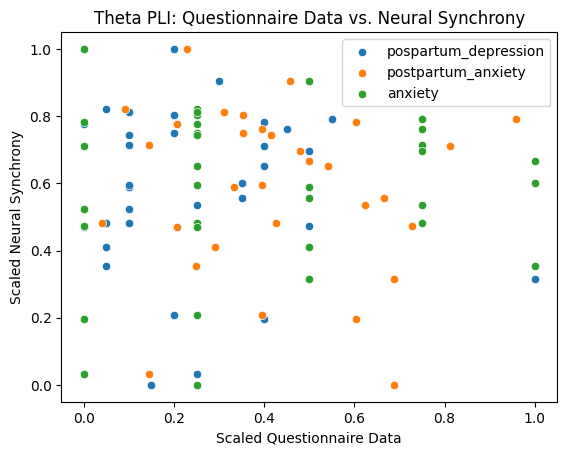

In [7]:
participant_indices_alpha_wpli, data_array_alpha_wpli = load_data(os.getcwd() + "/results/validated_results_alpha_wpli.json")
create_csv(data_array_alpha_wpli, participant_indices_alpha_wpli, "validated_data_alpha_wpli.csv", os.getcwd() + '/results')
df_melted_alpha_wpli = prepare_data_frame(data_array_alpha_wpli)
test_normality(df_melted_alpha_wpli)
fisher_z_transform(data_array_alpha_wpli)
statistical_testing(df_melted_alpha_wpli)
visualize_results(df_melted_alpha_wpli, 
                  frequency='alpha',
                  method = 'wPLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="alpha_results_wpli.png",
                  save_folder=os.getcwd() + '/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_alpha_wpli.json", 
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'], 
#                        sfreq=250,
#                        threshold=0.37)
visualize_difference(results_path=os.getcwd() + "/results/validated_results_alpha_wpli.json",
                     mom_epochs_path=os.getcwd() + "/results/moms_epochs_averaged.pkl",
                     baby_epochs_path=os.getcwd() + "/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)
linear_regression_analysis(os.getcwd() + "/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", os.getcwd() + '/results/validated_data_alpha_wpli.csv')

# Theta wPLI

Test statistic: 0.9456614255905151
p-value =  5.716429313906701e-06 -> data is non-normally distributed
Test statistic: 0.9361592531204224
p-value =  9.907595313052298e-07 -> data is non-normally distributed
Main effect
             Source         W  ddof1          Q     p-unc
Friedman  Condition  0.144536      4  19.078788  0.000758
Post-hoc test result: 

            FreePlay1  StillFace1  FreePlay2  StillFace2   Reunion
FreePlay1    1.000000    0.089050   0.503786    0.586308  0.123839
StillFace1   0.089050    1.000000   0.002161    0.089050  0.000428
FreePlay2    0.503786    0.002161   1.000000    0.568229  0.359146
StillFace2   0.586308    0.089050   0.568229    1.000000  0.417964
Reunion      0.123839    0.000428   0.359146    0.417964  1.000000


Z-values:

[[   0. -166. -240. -258. -180.]
 [ 166.    0.  -94. -167.  -68.]
 [ 240.   94.    0. -251. -216.]
 [ 258.  167.  251.    0. -227.]
 [ 180.   68.  216.  227.    0.]]
Plot saved to: /home/agata/Desktop/thesis/results/theta_res

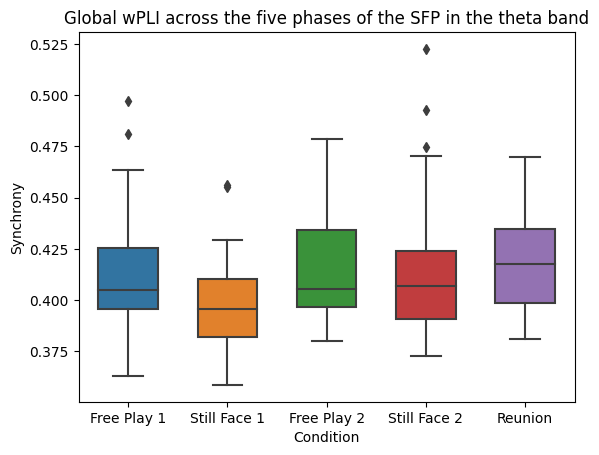

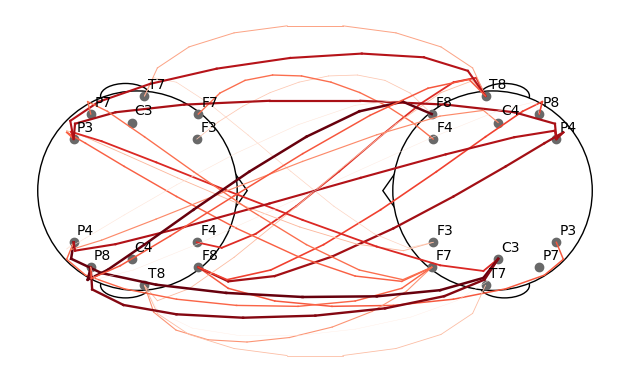

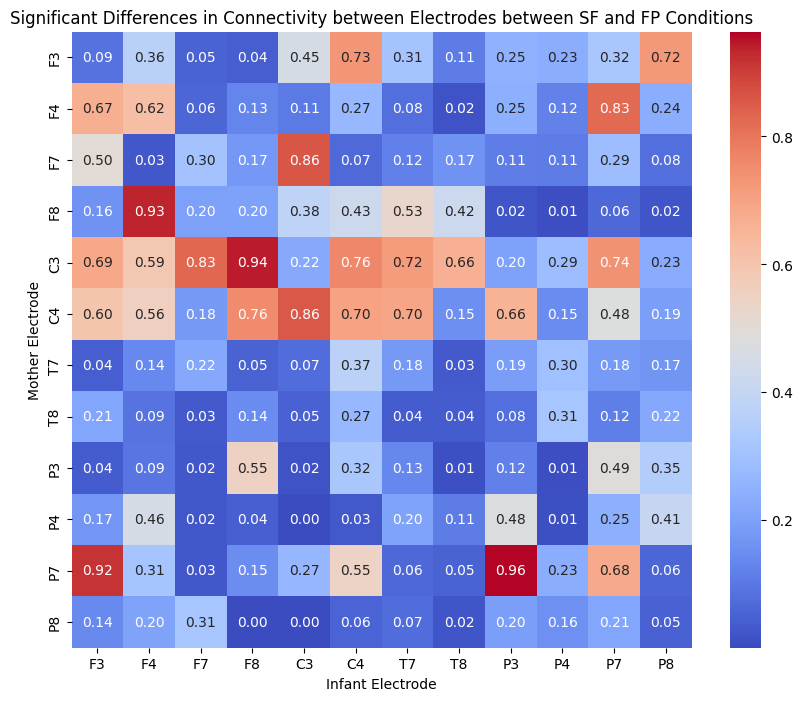

[5.108143684822925, 1.7645542651957087, 1.7751809775262448, 1.0271110190723]
[1.         0.94424344 0.69598817 0.24435128]


/home/agata/Desktop/thesis/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


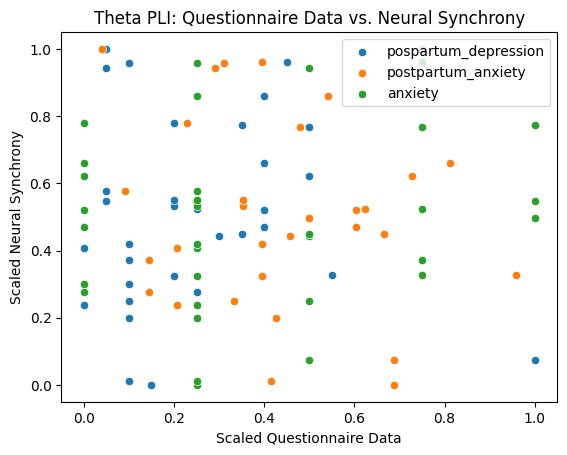

In [8]:
participant_indices_theta_wpli, data_array_theta_wpli = load_data(os.getcwd() + "/results/validated_results_theta_wpli.json")
create_csv(data_array_theta_wpli, participant_indices_theta_wpli, "validated_data_theta_wpli.csv", os.getcwd() + '/results')
df_melted_theta_wpli = prepare_data_frame(data_array_theta_wpli)
test_normality(df_melted_theta_wpli)
fisher_z_transform(data_array_theta_wpli)
statistical_testing(df_melted_theta_wpli)
visualize_results(df_melted_theta_wpli, 
                  frequency='theta',
                  method='wPLI',
                  x_col_label='Condition', 
                  y_col_label='Synchrony',
                  title='across the five phases of the SFP',
                  x_tick_labels=['Free Play 1', 'Still Face 1', 'Free Play 2', 'Still Face 2', 'Reunion'],
                  save_filename="theta_results_wpli.png",
                  save_folder='/home/agata/Desktop/thesis/results')
# visualize_connectivity(results_path="/home/agata/Desktop/thesis/results/validated_results_theta_wpli.json", 
#                        mom_epochs_path="/home/agata/Desktop/thesis/results/moms_epochs_averaged.pkl", 
#                        baby_epochs_path="/home/agata/Desktop/thesis/results/baby_epochs_averaged.pkl", 
#                        ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4', 'T7', 'T8', 'P3', 'P4', 'P7', 'P8'], 
#                        sfreq=250,
#                        threshold=0.43)
visualize_difference(results_path=os.getcwd() + "/results/validated_results_theta_wpli.json",
                     mom_epochs_path=os.getcwd() + "/results/moms_epochs_averaged.pkl",
                     baby_epochs_path=os.getcwd() + "/results/baby_epochs_averaged.pkl",
                     ch_names=['F3', 'F4', 'F7', 'F8', 'C3', 'C4',
                               'T7', 'T8', 'P3', 'P4', 'P7', 'P8'],
                     sfreq=250,
                     alpha=0.05)
linear_regression_analysis(os.getcwd() + "/results/BrainsInSync_Qualtrics_June8-2022_FINAL.sav", os.getcwd() + '/results/validated_data_theta_wpli.csv')